# Optimal solutions to TSP instances of Very-Large-Scale Integration (VLSI) design 

The process of **Very Large Scale Integration (VLSI)** enables the creation of an integrated circuit (IC) by combining multiple MOS transistors onto one silicon chip. However, microprocessor designers have encountered numerous challenges during VLSI process due to the ever increasing number of parts printed on a silicon chip and the complexity of the microprocessors. VLSI can benefit from techniques which  allow the printing of MOS transistors onto one silicon chip in a time-effective way. More specifically, **Traveling Salesperson Problem (TSP)** is a known combinatorial optimization problem, the solutions of which can lead to an optimal or near-optimal printing of MOS transistors.

TSP is described as follows:
> Given a set of cities and the distance between each pair of cities, what is the shortest possible tour that visits each city exactly once, and returns to the starting city?

In this notebook, we will adopt approaches which lead to optimal solutions of the TSP, by using instances from VLSI process. The applied approaches utilise **graph theory**, which means that the set of cities construct an undirected graph. In such graph, **cities** are represented by graph's **vertices** and the **distances** between them are represented with graph's **edges**.

A typical graph whcich consist of 8 vertices can be shown below:

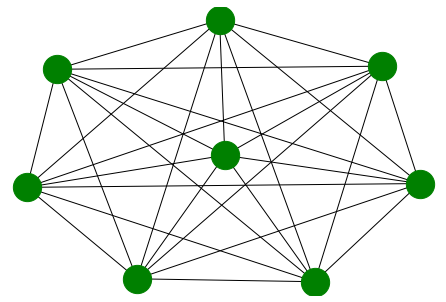

In [5]:

import networkx
 
G = networkx.complete_graph(8)
 
networkx.draw(G, node_color = 'green', node_size = 800)

Initially, let's see how the **basic terms of TSP** are applied to VLSI process:

* The term **city** represents each point of interest in VLSI instances.
* The **distance** between each pair of cities denotes the cost of the calculations.
* Since this distance is equal in both directions, the constructed graph is described as **undirected**.
* A **tour** is described as a specified order in which to visit all cities exactly once and return to the initial city.
* The sum of the distances between adjacent cities in the tour (including the last city back to the first city) is the **length** of the tour.

As a first step, we will import the necessary packages of our notebook.

In [1]:
#Import necessary packages

%matplotlib inline
import matplotlib.pyplot as plt
from itertools import permutations
import functools
from pandas import read_csv
from math import sqrt
from time import perf_counter

The datasets used in this project were provided by Andre Rohe, based on VLSI data sets studied at the Forschungsinstitut für Diskrete Mathematik, Universität Bonn [VLSI Instances](http://www.math.uwaterloo.ca/tsp/vlsi/index.html). These datasets contain coordinates of points of interest in 2-D. In this case, we will use an instance of 1483 cities.

In [2]:
df = read_csv("icw1483.tsp", sep=" ",skiprows=8, skipfooter=1,engine='python', usecols = [1,2],names=['X','Y'])
print(df)

        X    Y
0       0  106
1       0  109
2       0   11
3       0  113
4       0  120
...   ...  ...
1478  128   39
1479  128   53
1480  128   67
1481  128   81
1482  128   95

[1483 rows x 2 columns]


## All Tours Algorithm

Naturally, the first thing that comes into our mind is to follow a **naive approach**; That is to **calculate all possible tours and find the shortest one**. Let's see the simple steps of this approach:
* Create all tours,
* Count total length of each tour, and
* Find shortest tour.

The distance between all cities are calculated based on Euclidean distance. These steps are illustated in the cell below:

In [5]:
alltours = permutations


def alltours_tsp(dataf):
    "Generate all possible tours of the cities and choose the shortest tour."
            
    return shortest_tour(alltours(dataf))

def shortest_tour(tours): 
    "Choose the tour with the minimum tour length."
    return min(tours, key=tour_length)

def tour_length(tour):
    "The total of distances between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

def distance(A, B):
    """Calculate distance between two points"""
    return sqrt((B[0]-A[0])**2 + (B[1]-A[1])**2)

Now, let's include the plot functions in order to get a more intuitive understanding of how this algorithm works.

In [6]:
def plot_tour(tour): 
    "Plot the cities as circles and the tour as lines between them."
    plot_lines(list(tour) + [tour[0]])
    
def plot_lines(points, style='go-'):
    "Plot lines to connect a series of points."
    plt.figure(figsize=(10, 10))
    plt.plot([p[0] for p in points], [p[1] for p in points], style)
    plt.axis('scaled'); plt.axis('off')
    
def plot_tsp(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the resulting tour, and print information."
    # Find how long the solution and time take
    t0 = perf_counter()
    tour = algorithm(cities)
    t1 = perf_counter()
    assert valid_tour(tour, cities)
    plot_tour(tour); plt.show()
    print("{} city tour with length {:.3f} in {:.3f} secs for {}"
          .format(len(tour), tour_length(tour), t1 - t0, algorithm.__name__))
    
def valid_tour(tour, cities):
    "Is tour a valid tour for these cities?"
    return len(tour) == len(cities)

Since optimal solutions to TSP instances demand intense computational effort, we will use a fraction of one typical **instance** with only **8,9 and 10 cities**. 

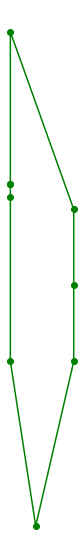

8 city tour with length 79.361 in 0.278 secs for alltours_tsp


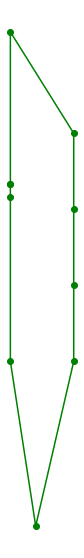

9 city tour with length 79.929 in 2.766 secs for alltours_tsp


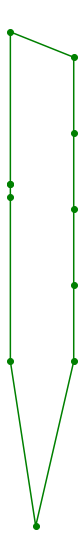

10 city tour with length 81.880 in 30.363 secs for alltours_tsp


In [7]:
for num_cities in range(8,11):
    cities = frozenset(zip(df[:num_cities]['X'],df[:num_cities]['Y']))
    plot_tsp(alltours_tsp, cities)

We notice that the calculation time increases extremely fast. This was expected to happen, since the **time complexity** of such algorithm is **O(n!)**. Let's try to improve this approach.

## All Non-Redundant Tours Algorithm

If we try to find all possible tours for three cities, we will see that some tour are indentical. For instance, for three cities, we find that there are 6 possible tours.

In [16]:
list(alltours({1, 2, 3}))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

However, tour **(1,2,3) and (1,3,2) are basically the same tour**, if we change the rotation of the movement. So, we can change the alltours function, by **starting with the same city in each tour**.

In [19]:
# improved alltours_tsp

def alltours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + list(rest)
            for rest in permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    return next(iter(collection))



We can check the improvement with the example of three cities. We now get only two possible tours, resulting in less calculations.

In [20]:
list(alltours({1, 2, 3}))

[[1, 2, 3], [1, 3, 2]]

We will use again the same number of samples with only 8,9 and 10 cities. 

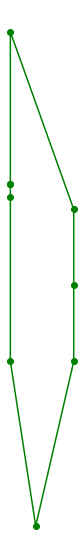

8 city tour with length 79.361 in 0.053 secs for alltours_tsp


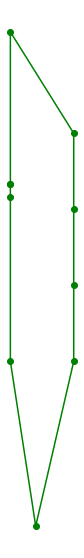

9 city tour with length 79.929 in 0.379 secs for alltours_tsp


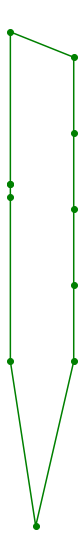

10 city tour with length 81.880 in 3.648 secs for alltours_tsp


In [21]:
for num_cities in range(8,11):
    cities = frozenset(zip(df[:num_cities]['X'],df[:num_cities]['Y']))
    plot_tsp(alltours_tsp, cities)

We can clearly see that the calcutation time has significantly improved, by ommitting the redundants tours in our calculations. But, is there any space for other improvements?

 ## Held-Karp Algorithm

The previous approach spends a lot of time by finding permutations that can't be an optimal tour. At this point, a new term comes in handy; **segment expresses a subsequence of a tour**. Then, the key part of this algorithm goes as follows:

> Given a start city A, an end city C, and a set of middle cities Bs, then out of all the possible segments that start in A, end in C, and go through all and only the cities in Bs, only the shortest of those segments could ever be part of an optimal tour.

By applying this algorithm, optimal solutions can be found with a time complexity reduced from O(n!) to O(n<sup>2</sup>*2<sup>n</sup>). 


In [23]:
def hk_tsp(cities):
    """The Held-Karp shortest tour of this set of cities.
    For each end city C, find the shortest segment from A (the start) to C.
    Out of all these shortest segments, pick the one that is the shortest tour."""
    A = first(cities)
    return shortest_tour(shortest_segment(A, cities - {A, C}, C)
                         for C in cities if C is not A)

We use the decorator @functools.lru_cache in order to cache the results of sub-computations because we will re-use them multiple times.

In [24]:
@functools.lru_cache(None)
def shortest_segment(A, Bs, C):
    "The shortest segment starting at A, going through all Bs, and ending at C."
    if not Bs:
        return [A, C]
    else:
        segments = [shortest_segment(A, Bs - {B}, B) + [C] 
                    for B in Bs]
        return min(segments, key=segment_length)
            
def segment_length(segment):
    "The total of distances between each pair of consecutive cities in the segment."
    return sum(distance(segment[i], segment[i-1]) 
               for i in range(1, len(segment)))

Now, let's check how this algorithm performs for the same set of cities as used in alltour algorithm.

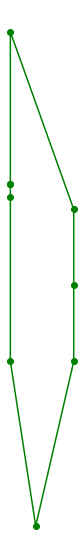

8 city tour with length 79.361 in 0.000 secs for hk_tsp


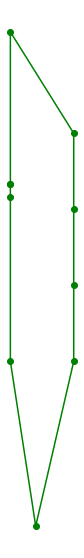

9 city tour with length 79.929 in 0.000 secs for hk_tsp


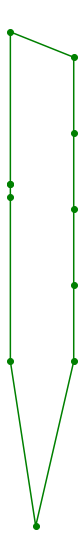

10 city tour with length 81.880 in 0.000 secs for hk_tsp


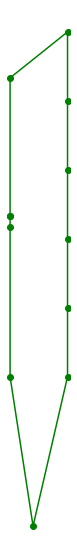

11 city tour with length 88.898 in 0.000 secs for hk_tsp


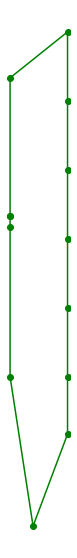

12 city tour with length 89.100 in 0.000 secs for hk_tsp


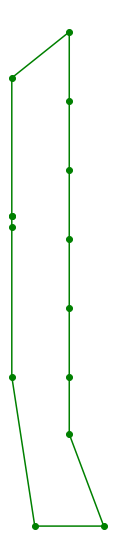

13 city tour with length 95.100 in 0.000 secs for hk_tsp


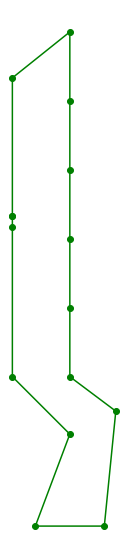

14 city tour with length 99.068 in 0.000 secs for hk_tsp


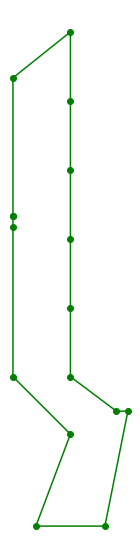

15 city tour with length 100.216 in 0.000 secs for hk_tsp


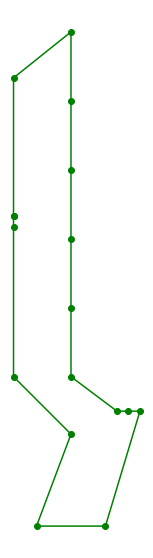

16 city tour with length 101.459 in 0.000 secs for hk_tsp


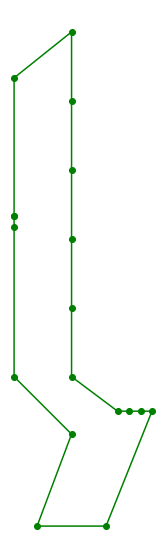

17 city tour with length 102.789 in 0.000 secs for hk_tsp


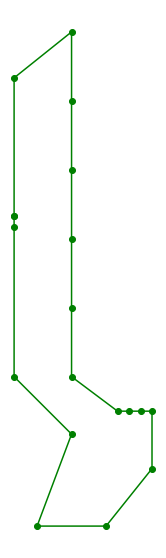

18 city tour with length 103.421 in 50.343 secs for hk_tsp


In [37]:
for num_cities in range(8,19):
    cities = frozenset(zip(df[:num_cities]['X'],df[:num_cities]['Y']))
    plot_tsp(hk_tsp, cities)

Optimal tours are also found, but this time a lot faster.

## Benchmarking for Optimal TSP Algorithms

Lastly, we can benchmark each approach in order to compare their performance.

In [26]:
@functools.lru_cache(None)
def benchmark(function, cities):
    "Run function on all the inputs; return pair of (average_time_taken, results)."
    t0           = perf_counter()
    results      = function(cities)
    t1           = perf_counter()
    execution_time = t1 - t0
    return (execution_time, results)

In [33]:
def benchmarks(tsp_algorithms, cities):
    "Print benchmark statistics for each of the algorithms."    
    for tsp in tsp_algorithms:
        time, results = benchmark(tsp, cities)
        lengths = tour_length(results) 
        print("Algorithm: {:>15}, executed in: {:7.8f}, secs for: {:3.0f} cities, with total tour length: {:5.3f} "
              .format(tsp.__name__,  time, len(cities), lengths))

In [34]:
algorithms = [hk_tsp, alltours_tsp]

benchmarks(algorithms, cities)

Algorithm:          hk_tsp, executed in: 0.00047724, secs for:  10 cities, with total tour length: 81.880 
Algorithm:    alltours_tsp, executed in: 3.48337365, secs for:  10 cities, with total tour length: 81.880 


Algortihm | Time Complexity | Length | Computation Time
--- | --- | --- | --- |
All tours | O(n!) | 81.88 | 3.48 sec
Held-Karp algorithm | O(n<sup>2</sup>2<sup>n</sup>) | 81.88 | 0.0004 sec

As we can see, the **Held-Karp algorithm significally reduces the computation time**. Nevertheless, it still **remains time-consuming** to be applied in instances of **higher than 25 cities**.